In [1]:
% matplotlib inline
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing, cross_validation, metrics, pipeline, feature_extraction
import re

In [2]:
df1 = pd.read_csv('movies.csv')

In [3]:
print df1.head(5)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
genres_split = df1['genres'].str.split('|',expand=True)

In [5]:
print genres_split

                        0          1         2         3         4     5  \
0               Adventure  Animation  Children    Comedy   Fantasy  None   
1               Adventure   Children   Fantasy      None      None  None   
2                  Comedy    Romance      None      None      None  None   
3                  Comedy      Drama   Romance      None      None  None   
4                  Comedy       None      None      None      None  None   
5                  Action      Crime  Thriller      None      None  None   
6                  Comedy    Romance      None      None      None  None   
7               Adventure   Children      None      None      None  None   
8                  Action       None      None      None      None  None   
9                  Action  Adventure  Thriller      None      None  None   
10                 Comedy      Drama   Romance      None      None  None   
11                 Comedy     Horror      None      None      None  None   
12          

In [6]:
newdf = pd.DataFrame({'Title' : [],'Genre':[]})

for col in genres_split:
    df = pd.DataFrame({'Title':df1['title'], 'Genre':genres_split[col]})
    newdf = pd.concat([newdf, df],ignore_index=True)


In [7]:
print newdf.head()
print newdf.tail()

       Genre                               Title
0  Adventure                    Toy Story (1995)
1  Adventure                      Jumanji (1995)
2     Comedy             Grumpier Old Men (1995)
3     Comedy            Waiting to Exhale (1995)
4     Comedy  Father of the Bride Part II (1995)
       Genre                         Title
342075  None             Grand Slam (1967)
342076  None             Bloodmoney (2010)
342077  None   The Butterfly Circus (2009)
342078  None                   Zero (2015)
342079  None  The 2000 Year Old Man (1975)


In [8]:
newdf['Genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical', 'IMAX', '(no genres listed)', None], dtype=object)

In [9]:
newdf.dropna(axis=0, inplace = True)

In [10]:
newdf['Genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical', 'IMAX', '(no genres listed)'], dtype=object)

In [11]:
newdf.head()
newdf.tail()

,Genre,Title
254457,Thriller,Lupin III: Sweet Lost Night (Rupan Sansei: Swe...
254529,Thriller,Lupin III: First Contact (Rupan Sansei: Faasut...
255511,Mystery,Rubber (2010)
289719,Thriller,Rubber (2010)
323927,Western,Rubber (2010)


In [12]:
newdf['Genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical', 'IMAX', '(no genres listed)'], dtype=object)

In [13]:
newdf = newdf[(newdf['Genre']!='(no genres listed)')]

In [14]:
newdf['Genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical', 'IMAX'], dtype=object)

In [15]:
newdf = newdf[(newdf['Genre']!='IMAX')]

In [16]:
newdf['Genre'].unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Western', 'Film-Noir', 'Romance', 'War', 'Sci-Fi',
       'Musical'], dtype=object)

In [17]:
print newdf.head(100)
print newdf.tail(100)

          Genre                                              Title
0     Adventure                                   Toy Story (1995)
1     Adventure                                     Jumanji (1995)
2        Comedy                            Grumpier Old Men (1995)
3        Comedy                           Waiting to Exhale (1995)
4        Comedy                 Father of the Bride Part II (1995)
5        Action                                        Heat (1995)
6        Comedy                                     Sabrina (1995)
7     Adventure                                Tom and Huck (1995)
8        Action                                Sudden Death (1995)
9        Action                                   GoldenEye (1995)
10       Comedy                     American President, The (1995)
11       Comedy                 Dracula: Dead and Loving It (1995)
12    Adventure                                       Balto (1995)
13        Drama                                       Nixon (1

In [18]:
# for i in range(1900,2020):
#     cut = "\("+str(i)+"\)"
#     #print string
#     newdf['Title'] = newdf['Title'].str.replace(cut,"")


In [19]:
newdf.head(100)
newdf.tail(100)

,Genre,Title
181912,Sci-Fi,Pulse (2006)
182111,Thriller,Lady on a Train (1945)
182270,Sci-Fi,Mind Game (2004)
182534,War,Blood Diamond (2006)
182537,Romance,She (1965)
182666,War,Izo (2004)
182756,Fantasy,Atlantis: Milo's Return (2003)
182791,Fantasy,TMNT (Teenage Mutant Ninja Turtles) (2007)
182825,Sci-Fi,Meet the Robinsons (2007)
182846,Mystery,Aqua Teen Hunger Force Colon Movie Film for Th...


In [20]:
def remove_year(x):
    return re.sub(r'\([0-9]{4}\)','',x).strip()

In [21]:
newdf['Title'] = newdf['Title'].apply(remove_year)

In [22]:
newdf['Title'] = newdf['Title'].str.lower()

In [23]:
newdf.head()
newdf.tail()

,Genre,Title
254457,Thriller,lupin iii: sweet lost night (rupan sansei: swe...
254529,Thriller,lupin iii: first contact (rupan sansei: faasut...
255511,Mystery,rubber
289719,Thriller,rubber
323927,Western,rubber


In [24]:
X = newdf['Title']
y = newdf['Genre']

In [25]:
text_pipeline = pipeline.make_pipeline(feature_extraction.text.CountVectorizer(),
                                       linear_model.LogisticRegression(multi_class='ovr'))

In [26]:
cross_validation.cross_val_score(text_pipeline, X=X, y=y, cv=3)

array([ 0.24846203,  0.22358452,  0.16652885])

In [27]:
text_pipeline2 = pipeline.make_pipeline(feature_extraction.text.CountVectorizer(),
                                        feature_extraction.text.TfidfTransformer(),
                                         linear_model.LogisticRegression())

In [28]:
cross_validation.cross_val_score(text_pipeline2, X=X, y=y, cv=3)

array([ 0.25984758,  0.23814116,  0.20181   ])

In [29]:
model = text_pipeline.fit(X,y)
y_pred = model.predict(X)

In [30]:
model2 = text_pipeline2.fit(X,y)
y_pred2 = model2.predict(X)

# transformer2 = feature_extraction.text.TfidfTransformer()
# transformer2.fit_transform(X,y)

In [31]:
metrics.accuracy_score(y_pred = y_pred, y_true = y)
metrics.confusion_matrix(y_pred = y_pred, y_true = y)

array([[  978,   151,    44,    10,   537,    93,    15,  2054,    23,
            0,   101,     2,    11,    14,   124,   249,    14,    25],
       [  299,   395,    55,    54,   459,    12,    20,  1155,    53,
            0,    34,     3,     4,    27,    89,    76,     7,    21],
       [  109,    76,   204,   121,   335,     3,    13,   407,    28,
            0,    20,     6,     2,    11,    41,     8,     1,     2],
       [   39,   111,    95,   211,   521,     4,     5,   525,    38,
            0,    13,     7,     1,    11,    16,     8,     1,     3],
       [  146,    81,    34,    56,  5584,    67,    49,  3554,    20,
            0,   168,     8,    29,   175,    45,    86,     7,    15],
       [  179,     7,     7,     1,   476,   275,    18,  2127,     1,
            0,    53,     2,    49,    17,     9,   221,     2,     2],
       [   22,    11,     1,     3,   350,    21,  1083,  1411,     0,
            0,    36,     4,     2,    16,    22,    41,    16,     1],

In [32]:
model.predict(["Cow in the city"])
model2.predict(["Cow in the city"])

array(['Drama'], dtype=object)

In [33]:
#sorted(zip(model.classes_,model.predict_proba(["kill bill"])[0]), key=lambda (c,p): (-p,c))

In [34]:
len(model.classes_)

18

In [40]:
model.classes_

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype=object)

In [35]:
##GUI

terry murders alice is a Crime
Crime 0.15209747235
Mystery 0.141430417802
Thriller 0.126230841611
Comedy 0.120822500251
Horror 0.0804658562272


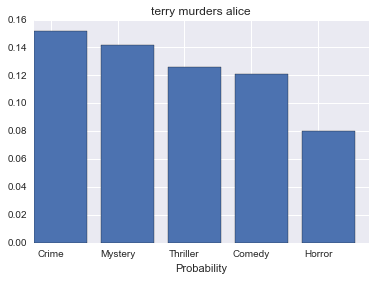

In [45]:
from IPython.display import display, clear_output
from IPython.html import widgets 
import matplotlib.pyplot as plt
%matplotlib inline

text = widgets.Text("CountVectorizer - Please enter movie name")
display(text)

def handle_submit(sender):   
    
    clear_output()
    
    print text.value + " is a " + model.predict([text.value.lower()])[0]
    
    sortgenre =  sorted(zip(model.classes_,model.predict_proba([text.value.lower()])[0]), key=lambda (c,p): (-p,c))
    
    chartx, charty = zip(*sortgenre)
    
    for i in range(5):
        print chartx[i], charty[i]
       
    ind = np.arange(5)  
    width = 0.50 
    plt.bar(ind,charty[0:5])
    plt.xticks(ind + width/2., chartx[0:5])
    plt.title(text.value)
    plt.xlabel("Category")
    plt.xlabel("Probability")

text.on_submit(handle_submit)


In [46]:
text = widgets.Text("TfidfTransformer - Please enter movie name")
display(text)

def handle_submit(sender):   
    
    clear_output()
    
    print text.value + " is a " + model2.predict([text.value.lower()])[0]
    
    sortgenre =  sorted(zip(model2.classes_,model2.predict_proba([text.value.lower()])[0]), key=lambda (c,p): (-p,c))
    
    chartx, charty = zip(*sortgenre)
    
    for i in range(5):
        print chartx[i], charty[i]
       
    ind = np.arange(5)  
    width = 0.50 
    plt.bar(ind,charty[0:5])
    plt.xticks(ind + width/2., chartx[0:5])
    plt.title(text.value)
    plt.xlabel("Category")
    plt.xlabel("Probability")

text.on_submit(handle_submit)